In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
titanic = pd.read_csv("data/titanic.csv")

In [3]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
titanic['Survived'] = titanic['Survived'].astype(object)
titanic['Pclass'] = titanic['Pclass'].astype(object)

In [5]:
titanic.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

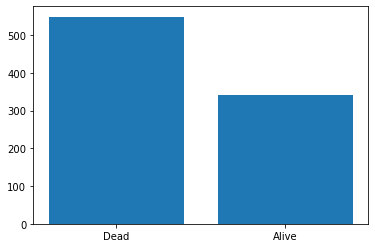

In [6]:
plt.bar((0, 1), titanic['Survived'].value_counts()) # 개수 구하는법.
plt.xticks((0, 1), ('Dead','Alive'))

#titanic['Survived'].value_counts().plot(kind='bar')

plt.show()

In [7]:
# for col in titanic.columns :
#     if titanic[col].dtypes == "object":
#         print(col)

category_feature = [ col for col in titanic.columns if titanic[col].dtypes == "object"]
category_feature

['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [8]:
def bar_chart(feature):
    alive = titanic[titanic['Survived']==1][feature].value_counts()
    dead = titanic[titanic['Survived']==0][feature].value_counts()
    df = pd.DataFrame([alive, dead])
    df.index = ['Alive','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

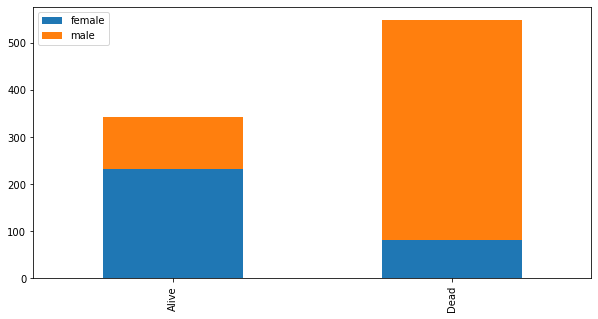

In [11]:
bar_chart('Sex')

# 차트는 여성이 남성보다 생존할 가능성이 더 높다는 것을 확인시켜 준다

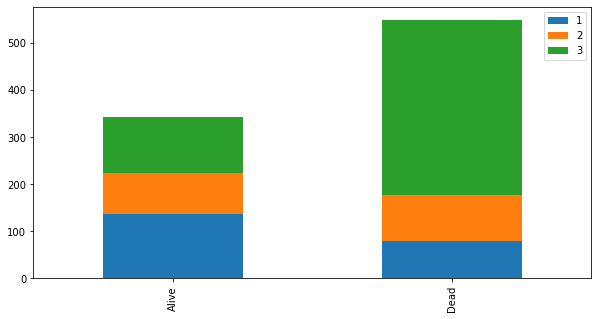

In [12]:
bar_chart('Pclass')

# 차트는 1등급 클래스가 다른 클래스보다 생존할 가능성이 더 높다는 것을 확인시켜 준다
# 차트는 3등급 클래스가 다른 클래스보다 죽을 가능성이 더 높다는 것을 확인시켜 준다

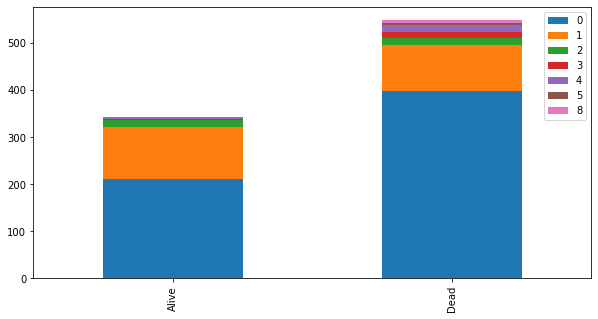

In [13]:
bar_chart('SibSp')

# 차트는 혼자인 사람보다 형제나 배우자가 있는 사람들이 생존할 가능성이 더 높다는 것을 확인시켜 준다

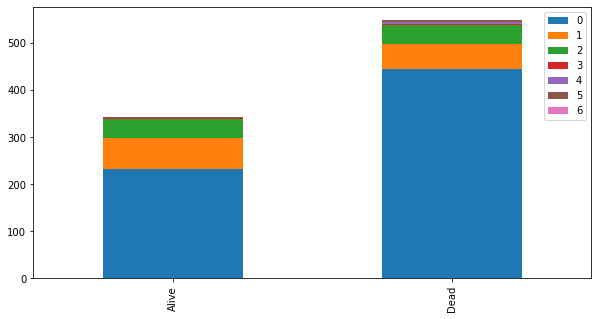

In [14]:
bar_chart('Parch')

# 차트는 혼자인 사람보다 부모나 자식이 있는 사람들이 생존할 가능성이 더 높다는 것을 확인시켜 준다

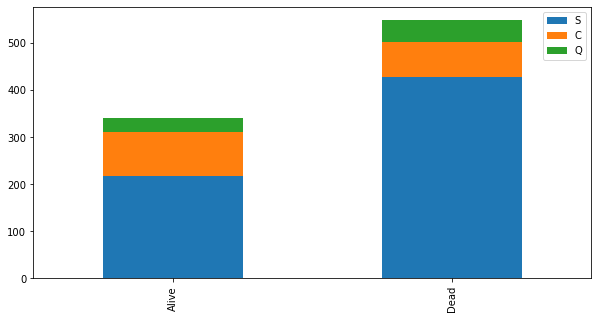

In [15]:
bar_chart('Embarked')

# C 선착장 탑승자의 경우 생존자가 더 많지만 다른 선착장 탑승자는 죽은 사람이 더 많을 가능성을 보여준다

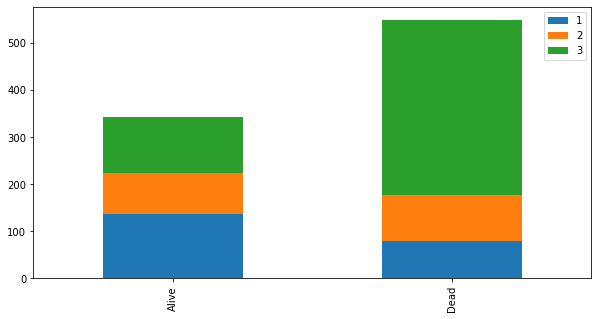

In [17]:
bar_chart('Pclass')

# 1등급이 확실히 많이 살았다.

<AxesSubplot:>

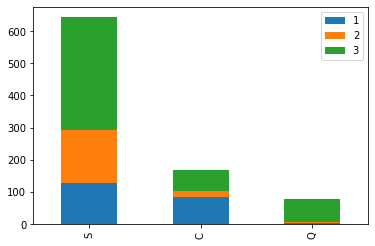

In [20]:
S = titanic[titanic['Embarked'] == 'S']['Pclass'].value_counts()
C = titanic[titanic['Embarked'] == 'C']['Pclass'].value_counts()
Q = titanic[titanic['Embarked'] == 'Q']['Pclass'].value_counts()
# df = pd.DataFrame([S, C, Q])
df.index = ['S', 'C', 'Q']
df.plot(kind='bar', stacked=True)